<a href="https://colab.research.google.com/github/zakidemo/Keras-CNN-code/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# install tensorflow version 2
%tensorflow_version 2.x
import tensorflow as tf

In [37]:
# Upload google drive in our colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Improting Libraries
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [39]:
# Create Path fro Both (Train/Test)
train_loc = '/content/drive/My Drive/our_DATA/train/'
test_loc = '/content/drive/My Drive/our_DATA/val/'

In [40]:
# resize images & do DA 
trdata = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip =True,
                            )

traindata = trdata.flow_from_directory( directory = train_loc, target_size = (224, 224))

tsdata = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            )

testndata = tsdata.flow_from_directory( directory = test_loc, target_size = (224, 224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [41]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [46]:
# define input
input_shape = (224,224,3)

# Create the network

# Input Layer
img_input = Input(shape = input_shape, name = 'img_input')

# Build the model

x = Conv2D(32, (3,3) , padding = 'same', activation='relu', name ='layer_1') (img_input)
x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_3') (x)
x =Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_5') (x)
x =Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same', activation='relu', name ='layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_7') (x)
x =Dropout(0.25)(x)

x =Flatten(name='layer_8')(x)
x = Dense(64, name = 'layer_9')(x)
x =Dropout(0.5)(x)
x =Dense(2, activation='sigmoid', name ='predections')(x)

In [47]:
# generate the model
model = Model(inputs = img_input, outputs  =x, name = 'CNN_COVID_19' )

In [48]:
# pint network structure
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 64)       

In [49]:
# Cmpiling the model
model.compile(optimizer = 'adam', loss = binary_crossentropy , metrics=['accuracy'])

In [52]:
# Start trian/Test
batch_size = 32
hist = model.fit(traindata, 
                 steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testndata,
                 validation_steps = testndata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
7/7 [==============================] - 12s 2s/step - loss: 1.0977 - accuracy: 0.6473 - val_loss: 0.5942 - val_accuracy: 0.8438
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.3691 - accuracy: 0.8807 - val_loss: 0.3438 - val_accuracy: 0.8958
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.3247 - accuracy: 0.8578 - val_loss: 0.4215 - val_accuracy: 0.8854
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.2630 - accuracy: 0.8945 - val_loss: 0.3821 - val_accuracy: 0.9062
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.1803 - accuracy: 0.9312 - val_loss: 0.2708 - val_accuracy: 0.9583
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.1121 - accuracy: 0.9587 - val_loss: 0.2467 - val_accuracy: 0.9479
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.2154 - accuracy: 0.9404 - val_loss: 0.2986 - val_accuracy: 0.9583
Epoch 8/10
7/7 [==================

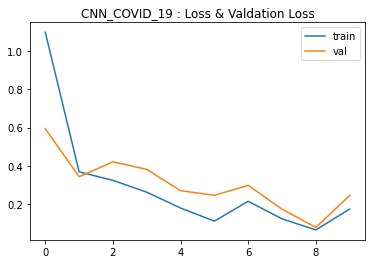

In [53]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label= 'val')
plt.title('CNN_COVID_19 : Loss & Valdation Loss')
plt.legend()
plt.show()

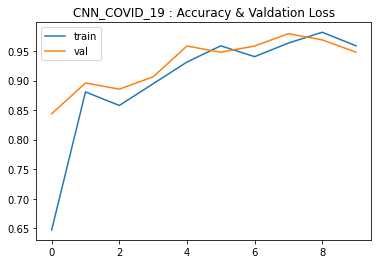

In [54]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label= 'val')
plt.title('CNN_COVID_19 : Accuracy & Valdation Loss')
plt.legend()
plt.show()

Confusion Matrix
[[31 24]
 [29 26]]
Classification_report
              precision    recall  f1-score   support

      COVID+       0.52      0.56      0.54        55
      COVID-       0.52      0.47      0.50        55

    accuracy                           0.52       110
   macro avg       0.52      0.52      0.52       110
weighted avg       0.52      0.52      0.52       110



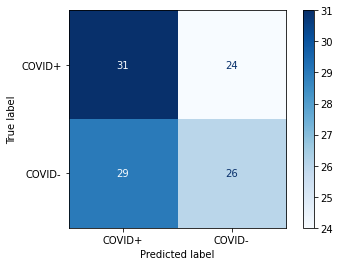

In [60]:
# Confusion Matrix & Precision & recall F1-score

target_names = ['COVID+','COVID-']
labels_names = [0,1]

Y_pred = model.predict_generator(testndata)
y_pred = np.argmax(Y_pred, axis = 1)
cm = confusion_matrix(testndata.classes, y_pred, labels = labels_names)

print('Confusion Matrix')
print(confusion_matrix(testndata.classes, y_pred))

print('Classification_report')
print(classification_report(testndata.classes, y_pred, target_names = target_names ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp = disp.plot(cmap = plt.cm.Blues, values_format = 'g')

plt.show()

